In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("NetflixOriginals.csv", encoding = "ISO-8859-1")
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [3]:
data.shape

(584, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [5]:
data.isna().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [6]:
data.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


# Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

In [7]:
data['Runtime'].describe()

count    584.000000
mean      93.577055
std       27.761683
min        4.000000
25%       86.000000
50%       97.000000
75%      108.000000
max      209.000000
Name: Runtime, dtype: float64

In [8]:
round(data["Runtime"].mean(),2)

93.58

In [9]:
long_runtime = data.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False).reset_index()
long_runtime

,Language,Runtime
0,English/Akan,136.000000
1,Khmer/English/French,136.000000
2,Marathi,121.666667
3,English/Korean,121.000000
4,Spanish/Catalan,116.000000
5,Korean,115.833333
6,Hindi,115.787879
7,English/Arabic,114.000000
8,Indonesian,103.777778
9,Turkish,101.800000


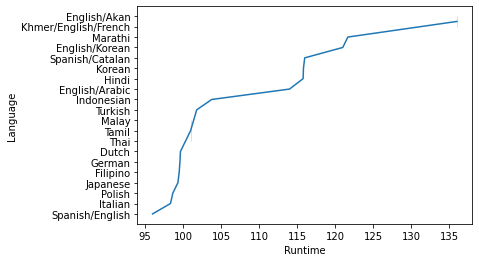

In [10]:
sns.lineplot(y=long_runtime["Language"], x=long_runtime.loc[(long_runtime["Runtime"] >= 93.58)]["Runtime"])
plt.show()

# 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [11]:
data["Date"] = pd.to_datetime(data.Premiere)
data["Date"].head()

0   2019-08-05
1   2020-08-21
2   2019-12-26
3   2018-01-19
4   2020-10-30
Name: Date, dtype: datetime64[ns]

In [12]:
data = data.drop('Premiere', axis=1)
data.head()

,Title,Genre,Runtime,IMDB Score,Language,Date
0,Enter the Anime,Documentary,58,2.5,English/Japanese,2019-08-05
1,Dark Forces,Thriller,81,2.6,Spanish,2020-08-21
2,The App,Science fiction/Drama,79,2.6,Italian,2019-12-26
3,The Open House,Horror thriller,94,3.2,English,2018-01-19
4,Kaali Khuhi,Mystery,90,3.4,Hindi,2020-10-30


In [13]:
documentary = data.loc[(data["Genre"] == "Documentary") & (data["Date"] > "2019-01-31") & (data["Date"] < "2020-06-01")]
documentary.sort_values(by="Date", ascending=True)

,Title,Genre,Runtime,IMDB Score,Language,Date
511,ReMastered: The Two Killings of Sam Cooke,Documentary,64,7.3,English,2019-02-08
524,Period. End of Sentence.,Documentary,26,7.4,English/Hindi,2019-02-12
324,Antoine Griezmann: The Making of a Legend,Documentary,60,6.5,French,2019-03-21
444,ReMastered: The Miami Showband Massacre,Documentary,70,7.0,English,2019-03-22
286,The Legend of Cocaine Island,Documentary,87,6.3,English,2019-03-29
536,Homecoming: A Film by Beyonce,Documentary,137,7.5,English,2019-04-17
554,Brene Brown: The Call to Courage,Documentary,76,7.7,English,2019-04-19
462,Grass Is Greener,Documentary,97,7.1,English,2019-04-20
442,ReMastered: Devil at the Crossroads,Documentary,48,7.0,English,2019-04-26
466,Knock Down the House,Documentary,87,7.1,English,2019-05-01


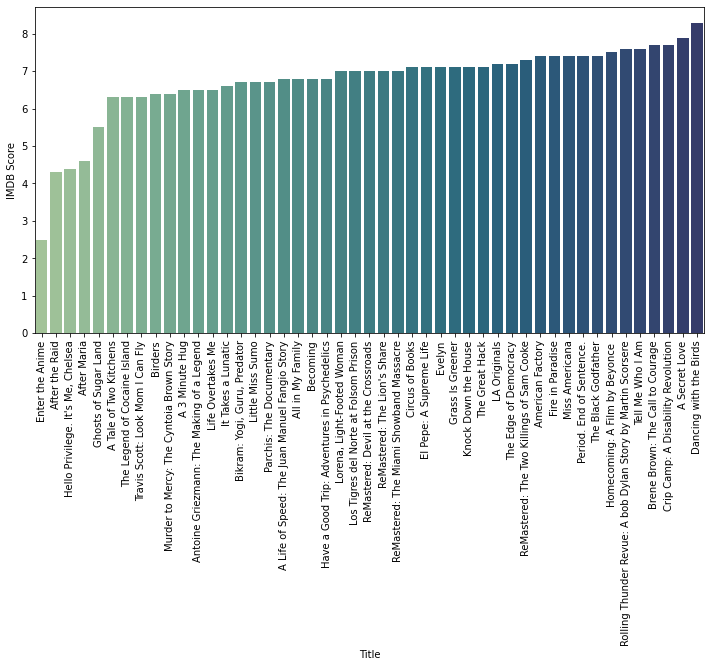

In [14]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(x=documentary["Title"], y=documentary["IMDB Score"], palette="crest")
plt.show()

# İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [15]:
eng_movie = data[["Title","IMDB Score", "Genre", "Language"]]
eng_movie.sort_values(["IMDB Score"], ascending=False)[:1]

,Title,IMDB Score,Genre,Language
583,David Attenborough: A Life on Our Planet,9.0,Documentary,English


# 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [16]:
hindi_lang = data[data["Language"]=="Hindi"]
round(hindi_lang['Runtime'].mean(),2)

115.79

# 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

In [17]:
data.Genre.nunique()

115

In [18]:
data.Genre.unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

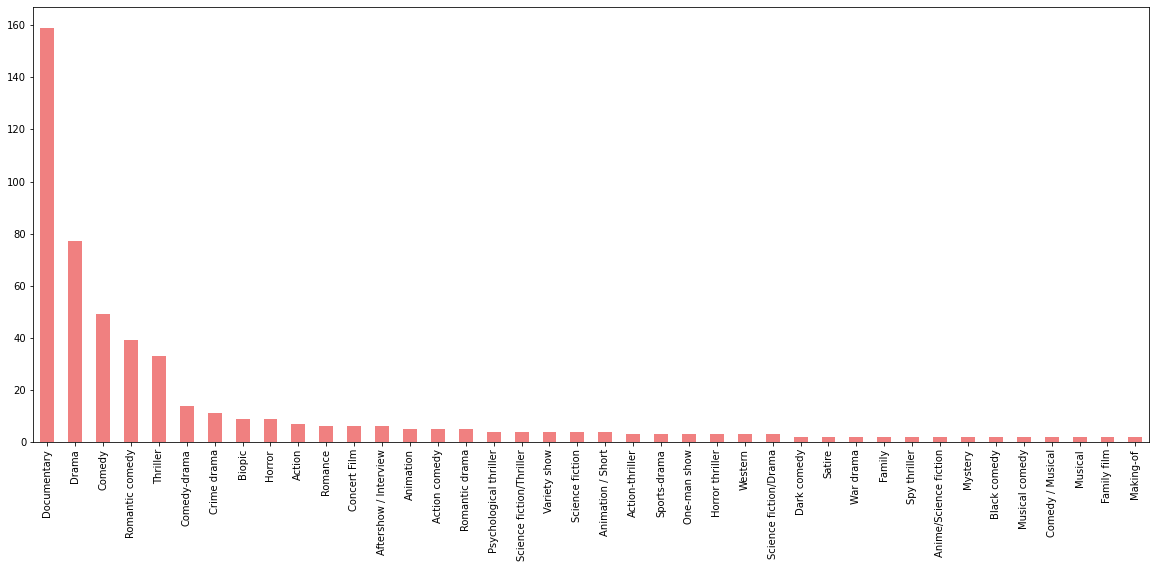

In [19]:
genre_top40 = data["Genre"].value_counts().nlargest(40)
genre_top40.plot(kind='bar', figsize=(20,8), color='lightcoral')
plt.show()

# Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [20]:
top_3_language = data["Language"].value_counts().nlargest(3)
print(top_3_language)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64


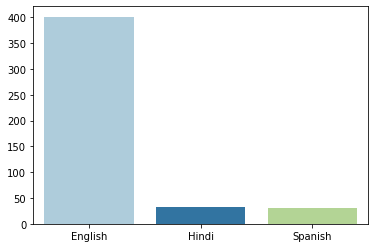

In [21]:
sns.barplot(x=top_3_language.index, y=top_3_language.values, palette="Paired")
plt.show()

# IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [22]:
top_10_movies = data[["IMDB Score", "Title", "Genre", "Language"]]
top_10_movies.sort_values(["IMDB Score"], ascending=False)[:10]

,IMDB Score,Title,Genre,Language
583,9.0,David Attenborough: A Life on Our Planet,Documentary,English
582,8.6,Emicida: AmarElo - It's All For Yesterday,Documentary,Portuguese
581,8.5,Springsteen on Broadway,One-man show,English
580,8.4,Winter on Fire: Ukraine's Fight for Freedom,Documentary,English/Ukranian/Russian
579,8.4,Taylor Swift: Reputation Stadium Tour,Concert Film,English
578,8.4,Ben Platt: Live from Radio City Music Hall,Concert Film,English
577,8.3,Dancing with the Birds,Documentary,English
576,8.3,Cuba and the Cameraman,Documentary,English
573,8.2,Klaus,Animation/Christmas/Comedy/Adventure,English
571,8.2,13th,Documentary,English


# IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

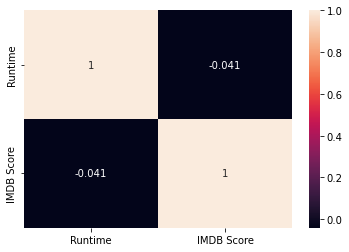

In [23]:
sns.heatmap(data.corr(), annot=True)
plt.show()

# IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [24]:
top_genres = data.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10].reset_index()
print(top_genres)

                                  Genre  IMDB Score
0                           Documentary         9.0
1                          One-man show         8.5
2                          Concert Film         8.4
3  Animation/Christmas/Comedy/Adventure         8.2
4                                 Drama         7.9
5                     Animation / Short         7.8
6                           Crime drama         7.8
7                       Musical / Short         7.7
8                             Making-of         7.7
9                             War drama         7.7


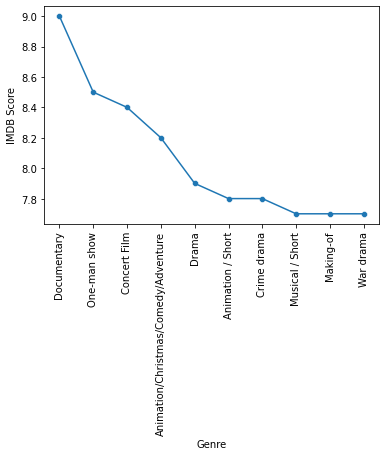

In [25]:
sns.scatterplot(y=top_genres["IMDB Score"], x=top_genres["Genre"])
sns.lineplot(y=top_genres["IMDB Score"], x=top_genres["Genre"])
plt.xticks(rotation=90)
plt.show()

# 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [26]:
top_10_runtime = data[["Title", "Runtime"]]
runtime = top_10_runtime.sort_values(["Runtime"], ascending=False)[:10]
print(runtime)

                               Title  Runtime
561                     The Irishman      209
328                      Da 5 Bloods      155
581          Springsteen on Broadway      153
247                         Citation      151
284               The Forest of Love      151
509                   Raat Akeli Hai      149
7    The Last Days of American Crime      149
543                             Ludo      149
194                 Army of the Dead      148
5                              Drive      147


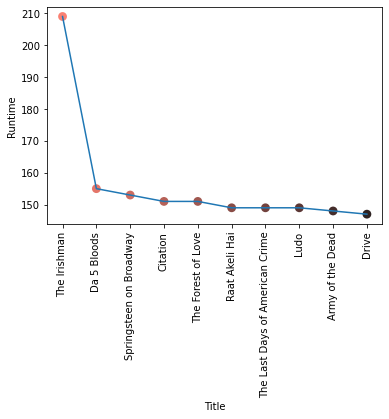

In [27]:
sns.pointplot(y=runtime["Runtime"], x=runtime["Title"], palette='dark:salmon_r')
sns.lineplot(y=runtime["Runtime"], x=runtime["Title"], palette='dark:salmon_r')
plt.xticks(rotation=90)
plt.show()

# Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [28]:
data["Year"] = data["Date"].dt.year
year = data["Year"].value_counts()
print(year)

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Year, dtype: int64


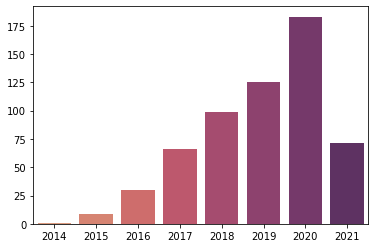

In [29]:
sns.barplot(x=year.index, y=year.values, palette="flare")
plt.show()

# Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [30]:
lowest_imdb = data.groupby("Language")["IMDB Score"].mean().nsmallest(15)
print(lowest_imdb)

Language
Malay               4.200000
English/Japanese    4.400000
Filipino            5.100000
Norwegian           5.100000
Polish              5.166667
Thai                5.450000
Swedish             5.500000
Italian             5.542857
Spanish/Basque      5.600000
German              5.640000
Turkish             5.660000
French              5.770000
Dutch               5.800000
Indonesian          5.844444
Korean              5.916667
Name: IMDB Score, dtype: float64


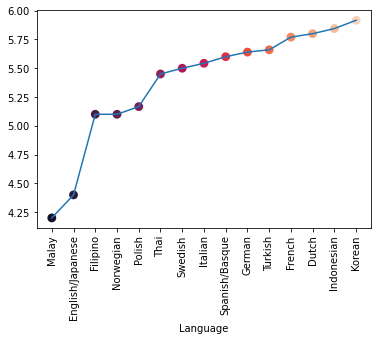

In [31]:
sns.pointplot(y=lowest_imdb.values, x=lowest_imdb.index, palette="rocket")
sns.lineplot(y=lowest_imdb.values, x=lowest_imdb.index)
plt.xticks(rotation=90)
plt.show()

# Hangi yılın toplam "runtime" süresi en fazladır?

In [32]:
total_runtime = data.groupby("Year")["Runtime"].sum().nlargest(1)
print(total_runtime)

Year
2020    17384
Name: Runtime, dtype: int64


# Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [33]:
language_genre = data.groupby(["Language"])["Genre"].value_counts(sort=True).groupby(level=0).head(1)
language_genre

Language                    Genre                
Bengali                     Documentary                1
Dutch                       Crime drama                1
English                     Documentary              120
English/Akan                War drama                  1
English/Arabic              Documentary                1
English/Hindi               Documentary                2
English/Japanese            Crime drama                1
English/Korean              Action-adventure           1
English/Mandarin            Documentary                2
English/Russian             Documentary                1
English/Spanish             Documentary                5
English/Swedish             Documentary                1
English/Taiwanese/Mandarin  Drama                      1
English/Ukranian/Russian    Documentary                1
Filipino                    Drama                      1
French                      Documentary                6
Georgian                    Documentar

# Veri setinde outlier veri var mıdır? Açıklayınız.

In [34]:
def find_outlier(data):
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    print('Lower bound is ' + str(lower_bound))
    print('Upper bound is ' + str(upper_bound))
    print("Q1: ",Q1)
    print("Q3: ",Q3)
    print("\n")
    
    outliers_vector = (data < (lower_bound)) | (data > (upper_bound))
    outliers = data[outliers_vector]
    print(outliers.index)

In [35]:
outlier_runtime = data['Runtime']
find_outlier(outlier_runtime) # outlier degerlerin indexlerini yazdirir.

Lower bound is 53.0
Upper bound is 141.0
Q1:  86.0
Q3:  108.0


Int64Index([  5,   7,  15,  16,  30,  33,  40,  66, 111, 118, 133, 152, 179,
            194, 197, 199, 244, 247, 263, 278, 284, 295, 301, 309, 320, 325,
            326, 328, 334, 345, 363, 365, 378, 389, 393, 394, 402, 407, 410,
            417, 427, 430, 434, 436, 439, 442, 445, 446, 451, 452, 453, 457,
            459, 471, 473, 485, 496, 498, 501, 506, 509, 513, 521, 522, 524,
            528, 529, 541, 543, 545, 552, 560, 561, 577, 581],
           dtype='int64')


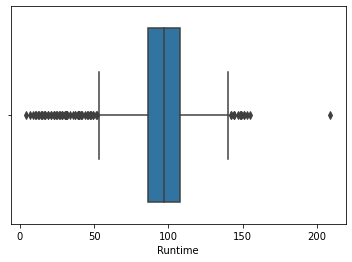

In [36]:
# Runtime outlier degerlerini goruntulemek icin boxplot
sns.boxplot(x=outlier_runtime)
plt.show()

In [37]:
outlier_imdb = data['IMDB Score']
find_outlier(outlier_imdb) # outlier degerlerin indexlerini yazdirir.

Lower bound is 3.7500000000000004
Upper bound is 8.95
Q1:  5.7
Q3:  7.0


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 583], dtype='int64')


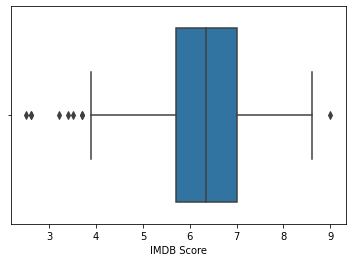

In [38]:
# IMDB Score outlier degerlerini goruntulemek icin boxplot
sns.boxplot(x=outlier_imdb)
plt.show()